In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle


In [2]:
import pyodbc

In [3]:
conn = pyodbc.connect(
    "Driver={SQL Server};"
    "Server=DESKTOP-7K1D2RJ;"
    "Database=DWH;"
    "Trusted_Connection=yes;"
)

In [4]:
query = "SELECT * FROM FactComptabilite"
df = pd.read_sql(query, conn)

C:\Users\Ichrak\AppData\Local\Temp\ipykernel_3240\4042625595.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
query = """
SELECT 
    f.Amortissement_Cumule,
    f.Cout_de_Maintenance,
    f.Investissement_dans_les_Actifs,
    f.Revenu
FROM 
    FactComptabilite f
"""
# Fetch the data into a DataFrame
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display the data
print(df.head())


   Amortissement_Cumule  Cout_de_Maintenance  Investissement_dans_les_Actifs  \
0             4026739.0            5255891.0                     182826300.0   
1             8363473.0           10225318.0                     211300200.0   
2            12836290.0            8940646.0                     264511400.0   
3            17133930.0           12949347.0                     194698300.0   
4            23981740.0            8975540.0                     293709800.0   

         Revenu  
0  5.534759e+09  
1  5.525097e+09  
2  5.784253e+09  
3  5.783704e+09  
4  5.955701e+09  


C:\Users\Ichrak\AppData\Local\Temp\ipykernel_3240\816586264.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [7]:
df.shape

(100, 4)

In [8]:
df.columns

Index(['Amortissement_Cumule', 'Cout_de_Maintenance',
       'Investissement_dans_les_Actifs', 'Revenu'],
      dtype='object')

In [9]:
# Calculate the total number of rows in the DataFrame
total_rows = df.shape[0]

# Calculate the number of missing values (NaN) for each feature
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each feature
percentage_missing = (missing_values / total_rows) * 100

# Create a DataFrame to store the results
missing_data_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})

# Display the DataFrame
print(missing_data_info)

                                Missing Values  Percentage
Amortissement_Cumule                         1         1.0
Cout_de_Maintenance                          1         1.0
Investissement_dans_les_Actifs               1         1.0
Revenu                                       1         1.0


In [10]:
# List of features considered relevant for predictive modeling
relevant_features = ['Amortissement_Cumule', 'Cout_de_Maintenance', 'Investissement_dans_les_Actifs', 'Revenu']


# Create a new DataFrame with only the relevant features
df_relevant = df[relevant_features].copy()

# Display the first few rows of the new DataFrame
print(df_relevant.shape)


(100, 4)


In [11]:
df_relevant

,Amortissement_Cumule,Cout_de_Maintenance,Investissement_dans_les_Actifs,Revenu
0,4026739.0,5255891.0,182826300.0,5.534759e+09
1,8363473.0,10225318.0,211300200.0,5.525097e+09
2,12836290.0,8940646.0,264511400.0,5.784253e+09
3,17133930.0,12949347.0,194698300.0,5.783704e+09
4,23981740.0,8975540.0,293709800.0,5.955701e+09
...,...,...,...,...
95,134151200.0,13387523.0,231027700.0,6.418321e+09
96,106796700.0,5706196.0,287120100.0,7.339604e+09
97,132705000.0,8782928.0,294497000.0,6.008380e+09
98,85889090.0,5283669.0,244334300.0,6.143543e+09


In [12]:
df_relevant = df_relevant.dropna()


In [13]:
# Calculate the number of missing values for each feature
missing_values_per_feature = df_relevant.isnull().sum()

# Display the missing values for each feature
print("Missing Values per Feature:")
print(missing_values_per_feature)

Missing Values per Feature:
Amortissement_Cumule              0
Cout_de_Maintenance               0
Investissement_dans_les_Actifs    0
Revenu                            0
dtype: int64


In [14]:
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns
categorical_columns = df_relevant.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df_relevant[col] = label_encoder.fit_transform(df_relevant[col])

df_relevant

,Amortissement_Cumule,Cout_de_Maintenance,Investissement_dans_les_Actifs,Revenu
0,4026739.0,5255891.0,182826300.0,5.534759e+09
1,8363473.0,10225318.0,211300200.0,5.525097e+09
2,12836290.0,8940646.0,264511400.0,5.784253e+09
3,17133930.0,12949347.0,194698300.0,5.783704e+09
4,23981740.0,8975540.0,293709800.0,5.955701e+09
...,...,...,...,...
94,109391200.0,7162957.0,213829700.0,6.893958e+09
95,134151200.0,13387523.0,231027700.0,6.418321e+09
96,106796700.0,5706196.0,287120100.0,7.339604e+09
97,132705000.0,8782928.0,294497000.0,6.008380e+09


In [15]:
# Calculate the total number of rows in the DataFrame
total_rows = df.shape[0]

# Calculate the number of missing values (NaN) for each feature
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each feature
percentage_missing = (missing_values / total_rows) * 100

# Create a DataFrame to store the results
missing_data_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})

# Display the DataFrame
print(missing_data_info)

                                Missing Values  Percentage
Amortissement_Cumule                         1         1.0
Cout_de_Maintenance                          1         1.0
Investissement_dans_les_Actifs               1         1.0
Revenu                                       1         1.0


In [16]:
df = df_relevant

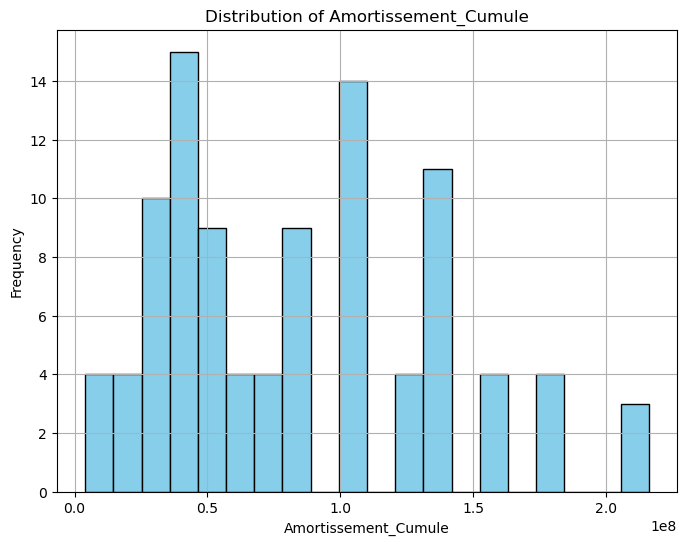

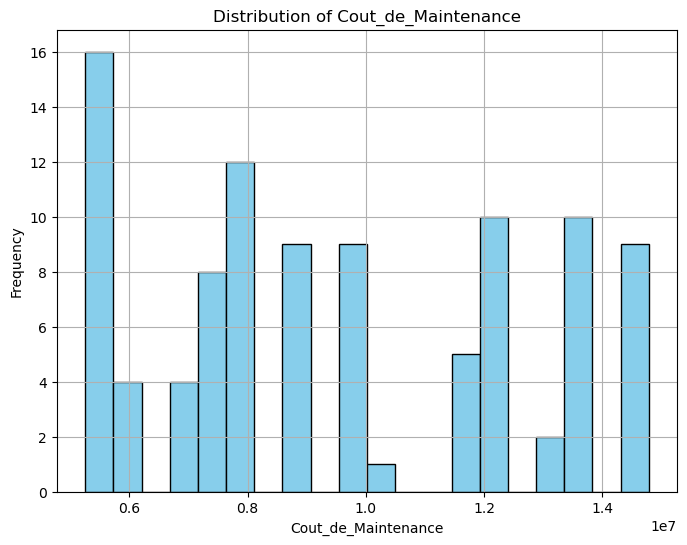

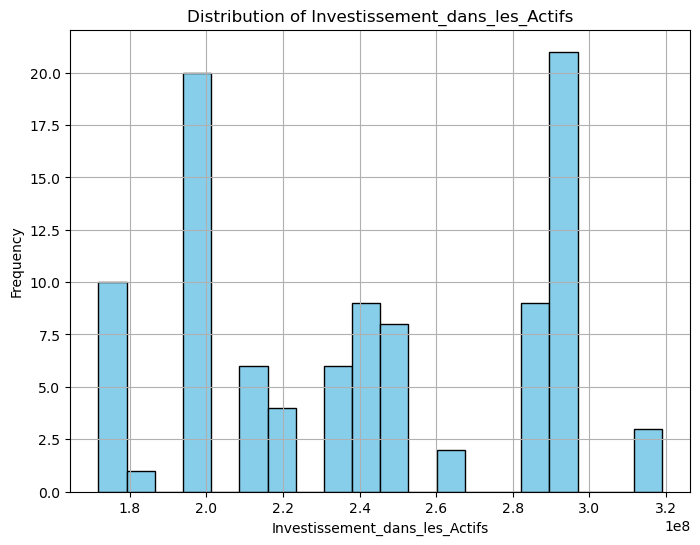

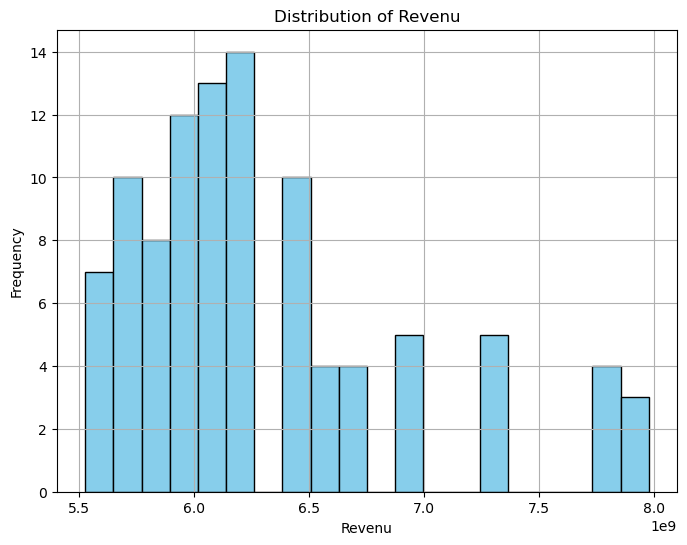

In [17]:
import matplotlib.pyplot as plt

def plot_distribution(df, feature_name):
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature_name], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Loop through the first 12 columns of the DataFrame
for column in df.columns[:]:
    plot_distribution(df, column)

In [18]:
df.columns

Index(['Amortissement_Cumule', 'Cout_de_Maintenance',
       'Investissement_dans_les_Actifs', 'Revenu'],
      dtype='object')

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame with the relevant features and the target variable 'SALARY'

# Separate features (X) and target variable (y)
X = df.drop(columns=['Revenu'])
y = df['Revenu']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Initialize and train Random Forest Regression model
rf_reg_model = RandomForestRegressor(random_state=42)
rf_reg_model.fit(X_train, y_train)

# Predictions
linear_reg_pred = linear_reg_model.predict(X_test)
rf_reg_pred = rf_reg_model.predict(X_test)

# Calculate Mean Squared Error for each model
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)




 ## Linear Regression Mean Squared Error: 2.8716512539681632e+17
## Random Forest Regression Mean Squared Error: 8.634944113860573e+16


In [20]:
new_data = pd.DataFrame([{
    'Amortissement_Cumule': 0777.0,
    'Cout_de_Maintenance': 6.0,
    'Investissement_dans_les_Actifs': 1.0
}])


In [26]:
# Predict salary for the new data
newprediction_rf = rf_reg_model.predict(new_data)
new_prediction_linear = linear_reg_model.predict(new_data)


## Predicted : [5.71475672e+09]

## Predicted : [4.94672732e+09]

In [22]:
import pickle


In [ ]:
import pickle

# Sauvegarde du modèle Linear Regression dans un fichier .pkl
with open('linear_reg_model.pkl', 'wb') as file:
    pickle.dump(linear_reg_model, file)




## ✔️ Modèle Linear Regression sauvegardé dans 'linear_reg_model.pkl'")